In [1]:
import matplotlib.pyplot as plt

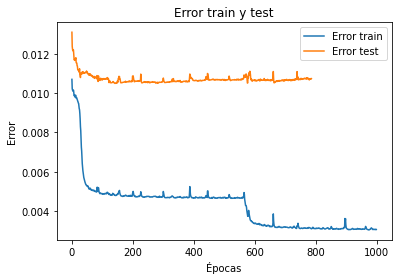

In [2]:
def plot_train_and_test_error(train_error_txt, test_error_txt):
    train_error = [float(line) for line in open(train_error_txt).readlines()]
    test_error = [float(line) for line in open(test_error_txt).readlines()]

    fig, ax = plt.subplots()
    ax.plot(train_error, label="Error train")
    ax.plot(test_error, label="Error test")
    ax.legend()
    ax.set_title("Error train y test")
    ax.set_xlabel("Épocas")
    ax.set_ylabel("Error")
    plt.show()

plot_train_and_test_error("models/doberman_256_arch1/train_loss.txt", "models/doberman_256_arch1/test_loss.txt")